# Problem Statement
Data Link : 
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset



# Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Content
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


# Project Objective

**Background Goal:-**
- To determine the important factors or variables are the strongest predictors of default payment and that can influence the chance of credit card default.
- The probabilities of default on a payment that are affected by a variety of demographic factors.

**Business Impact:-**
- Predict the chance of the bank's customers defaulting on their credit cards in the future month.
- Build a strategy to convert bad customer to good customer.
- Loss Provisioning



In [848]:
# Importing Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [849]:
# Importing dataset
# data=pd.read_csv('https://raw.githubusercontent.com/DIBSMASH/DIBYA-PROJECT/main/UCI_Credit_Card.csv')
data=pd.read_csv('UCI_Credit_Card.csv')

In [850]:
data.sample(15) #head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
13262,13263,40000.0,2,2,1,24,2,0,0,2,...,29633.0,31548.0,30889.0,1800.0,4500.0,0.0,2400.0,0.0,3000.0,1
13820,13821,60000.0,1,3,2,52,0,0,0,0,...,26305.0,23756.0,25353.0,1500.0,1500.0,2000.0,1500.0,2000.0,2000.0,0
28220,28221,30000.0,2,2,1,33,3,2,2,7,...,2400.0,2400.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27021,27022,100000.0,1,1,2,32,0,0,0,0,...,11788.0,11400.0,11419.0,2787.0,1353.0,1739.0,0.0,1000.0,1147.0,0
24184,24185,160000.0,1,1,2,28,0,0,0,0,...,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0
3427,3428,20000.0,1,2,2,48,0,0,2,0,...,10695.0,11365.0,12170.0,4500.0,0.0,1000.0,1000.0,1000.0,1000.0,0
15465,15466,160000.0,1,3,2,30,0,0,0,0,...,0.0,0.0,0.0,8365.0,9368.0,0.0,0.0,0.0,0.0,0
21836,21837,80000.0,2,1,2,23,0,0,0,0,...,60514.0,48965.0,29648.0,3117.0,2519.0,1838.0,1434.0,1015.0,1505.0,0
19352,19353,290000.0,2,2,1,49,-1,0,0,0,...,35058.0,36965.0,38863.0,3000.0,3500.0,2500.0,2500.0,2500.0,2000.0,0
21679,21680,210000.0,2,2,1,25,0,0,0,0,...,10838.0,12652.0,13060.0,1149.0,1173.0,1186.0,2000.0,1000.0,1000.0,0


# Data Exploration and Validation


In [851]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [852]:
data.shape

(30000, 25)

In [853]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [854]:
# Checking for null values in any columns
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [855]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [856]:
# data.rename(columns={"default.payment.next.month": "DEF_PAY"}, inplace=True)

# Data Exploration

## Categorical Variable Exploration

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


<Axes: ylabel='count'>

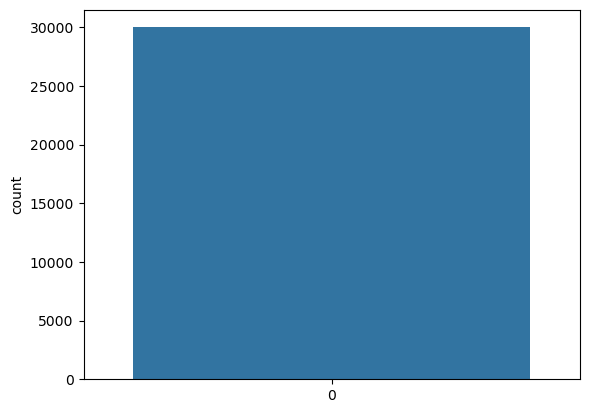

In [857]:
# Category 0,5,6 are undocumented so needed to be checked
print(data['EDUCATION'].value_counts())
sns.countplot(data['EDUCATION'])

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


<Axes: ylabel='count'>

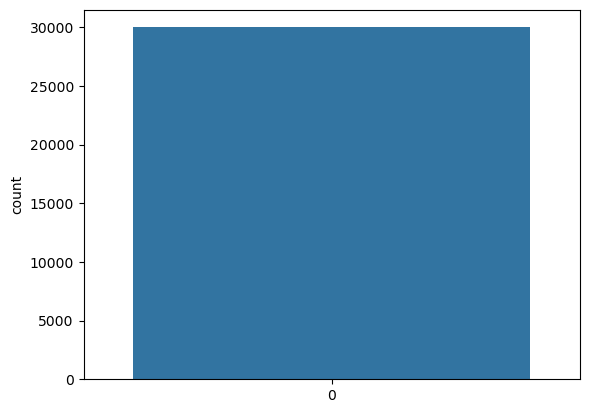

In [858]:
# Category 0 is undocumented to be checked
print(data['MARRIAGE'].value_counts())
sns.countplot(data['MARRIAGE'])

<Axes: ylabel='count'>

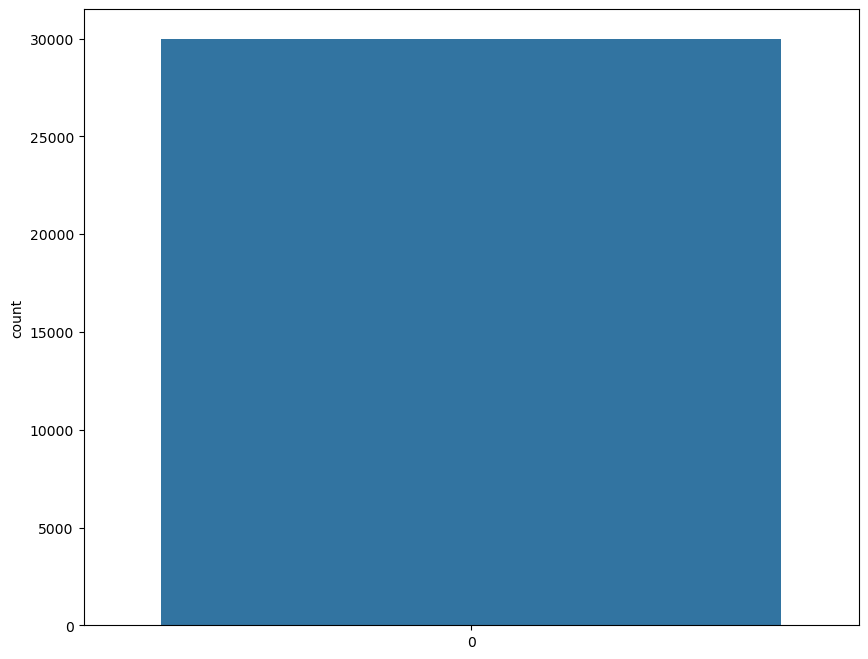

In [859]:
# Some of the age values are more than 70 which is fine.
plt.figure(figsize=(10,8))
data['AGE'].value_counts()
sns.countplot(data['AGE'])

In [860]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [861]:
# All the pay are having -2,0 category that are undocumented.
# Given category -1 as pay duly(properly paid on time)
# So -2,0,-1 can be treated as one category. to be checked
print(data['PAY_0'].value_counts())
print(data['PAY_2'].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


<Axes: xlabel='SEX', ylabel='count'>

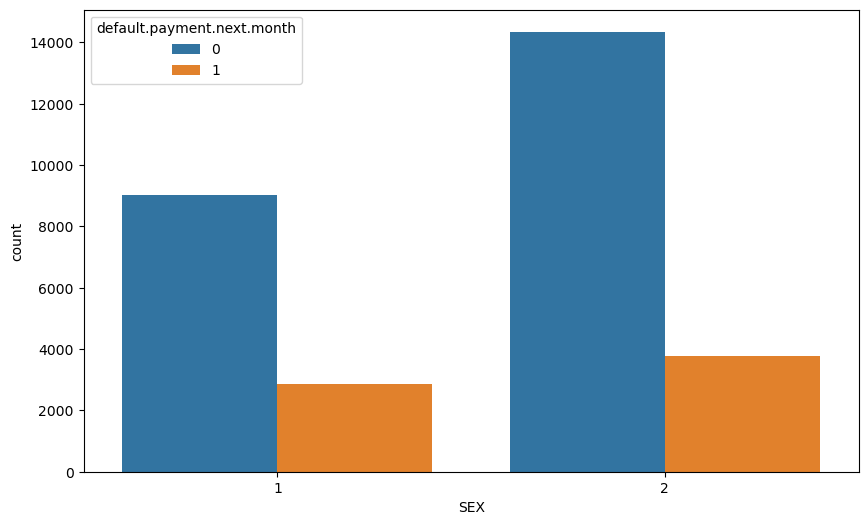

In [862]:
plt.figure(figsize=(10,6))
sns.countplot(x =data.iloc[:,2], hue = data.iloc[:,24] , data = data)

<Axes: xlabel='EDUCATION', ylabel='count'>

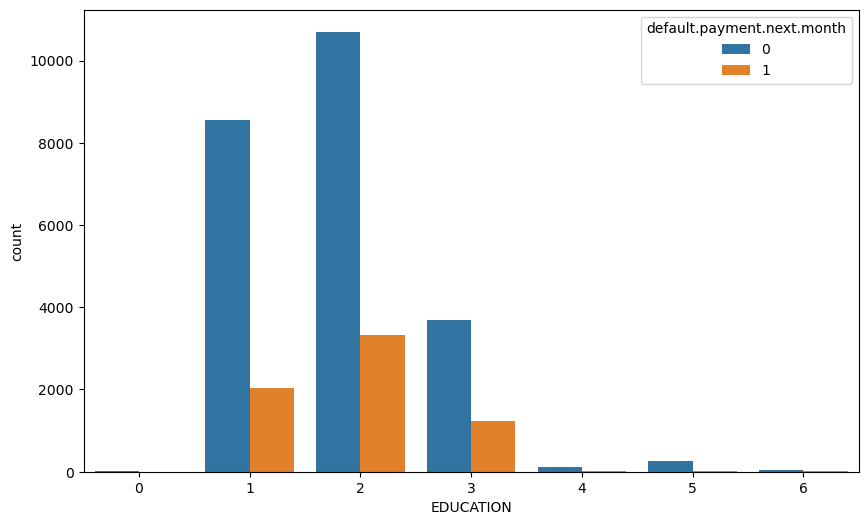

In [863]:
plt.figure(figsize=(10,6))
sns.countplot(x =data.iloc[:,3], hue = data.iloc[:,24] , data = data)

<Axes: xlabel='MARRIAGE', ylabel='count'>

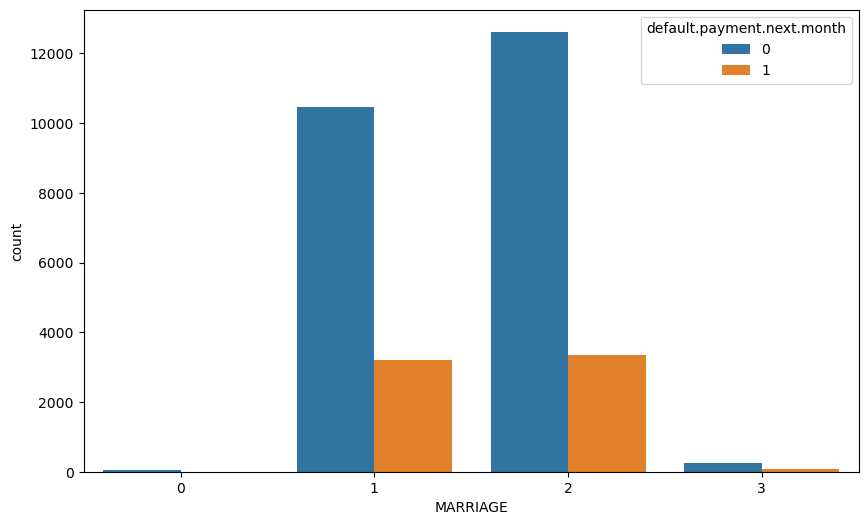

In [864]:
plt.figure(figsize=(10,6))
sns.countplot(x =data.iloc[:,4], hue = data.iloc[:,24] , data = data)

<Axes: xlabel='AGE', ylabel='count'>

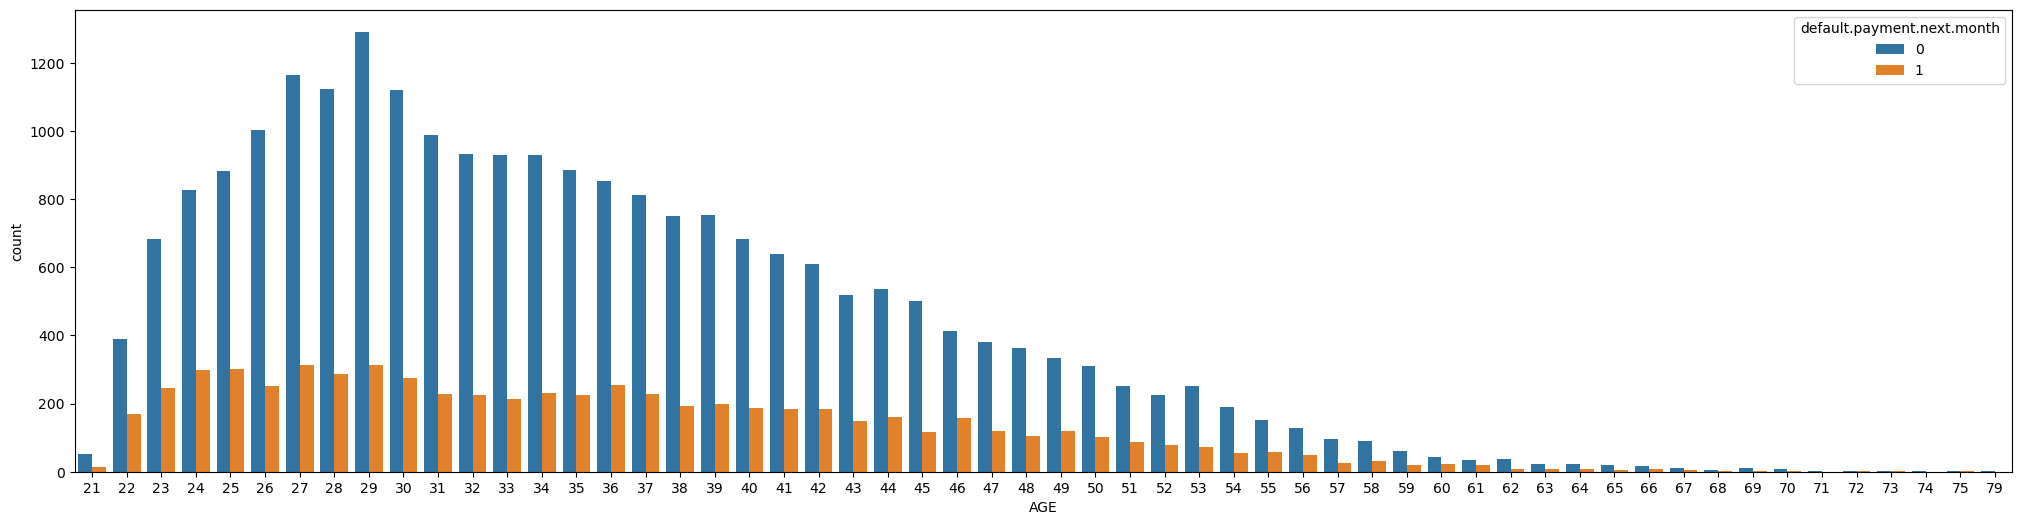

In [865]:
plt.figure(figsize=(25,6))
sns.countplot(x =data.iloc[:,5], hue = data.iloc[:,24] , data = data)

## Continous Variable Exploration

In [866]:
# BILL_AMT1 having 1% of negative values
# BILL_AMT2 TO BILL_AMT6 having 2% negative values
# can be treated as extra paid

# Looks like Bill amount has 1% of outliers - to be cleaned
data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.09,0.1,
0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.06,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00


<Axes: >

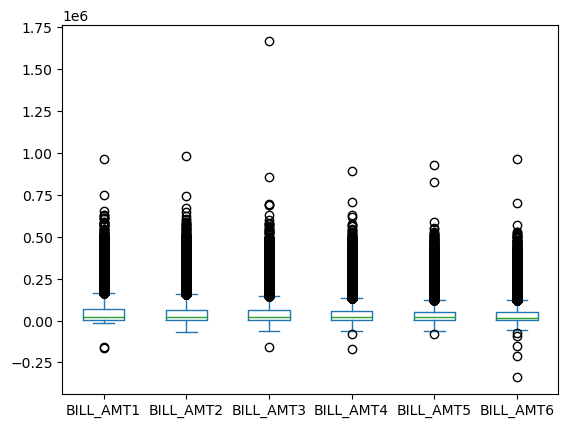

In [867]:
data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [868]:
# Pay amount has 1% of extreme outlier needed to be cleaned
data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2500.00,2100.00,2123.40,2100.00
0.70,4309.30,4045.30,3560.30,3200.00,3200.00,3200.00
0.80,6192.20,6000.00,5284.00,5000.00,5000.00,5000.00
0.90,10300.00,10401.10,10000.00,9570.60,9500.00,9600.00


<Axes: >

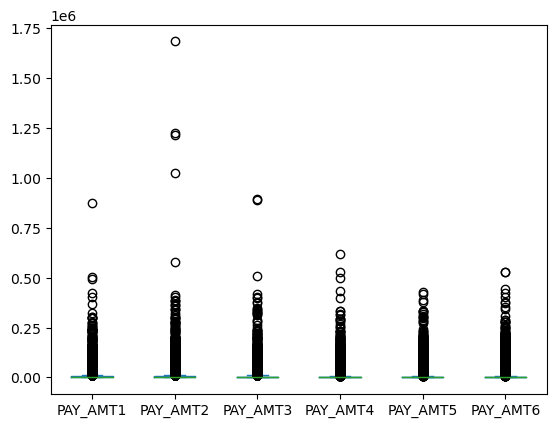

In [869]:
# Extreme Outliers have completely compressed the boxplot
data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [870]:
# Limit_Bal contains 1% of extreme outliers - require cleaning
data['LIMIT_BAL'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

0.00      10000.0
0.10      30000.0
0.20      50000.0
0.30      70000.0
0.40     100000.0
0.50     140000.0
0.60     180000.0
0.70     210000.0
0.80     270000.0
0.90     360000.0
0.93     390000.0
0.94     410000.0
0.97     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

<Axes: ylabel='LIMIT_BAL'>

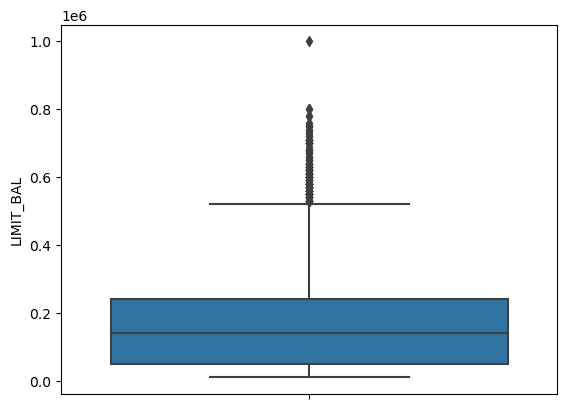

In [871]:
sns.boxplot(y=data['LIMIT_BAL'])

# Data Cleaning

## Cleaning Categorical Variables

In [872]:
# Simply Category 5,6,0 values are undocumented so we can pour it into category 4 metioned others.
unknown=(data['EDUCATION']==5)|(data['EDUCATION']==6)|(data['EDUCATION']==0)
data.loc[unknown,'EDUCATION']=4
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [873]:
# Category 0 value are undocumented so we can pour it into category 3 mentioned as others.
unknown=data['MARRIAGE']==0
data.loc[unknown,'MARRIAGE']=3
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [874]:
# Frequency of each category
data.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [875]:
#Cross tab with target
cross_data2=pd.crosstab(data['PAY_2'],data['default.payment.next.month'])

In [876]:
#Cross tab row Percentages
cross_data2_percent=cross_data2.apply(lambda x: x/x.sum(), axis=1)
round(cross_data2_percent,2)

default.payment.next.month,0,1
PAY_2,,
-2,0.82,0.18
-1,0.84,0.16
0,0.84,0.16
1,0.82,0.18
2,0.44,0.56
3,0.38,0.62
4,0.49,0.51
5,0.40,0.60
6,0.25,0.75


In [877]:
# Treating category -2,-1,0 value as one category 0 for pay duly 
# so going for imputation based on target variable values nearest to them.
fil = (data.PAY_0 == -2) | (data.PAY_0 == -1) | (data.PAY_0 == 0)
data.loc[fil, 'PAY_0'] = 0
fil = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[fil, 'PAY_2'] = 0
fil = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[fil, 'PAY_3'] = 0
fil = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[fil, 'PAY_4'] = 0
fil = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[fil, 'PAY_5'] = 0
fil = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[fil, 'PAY_6'] = 0

In [878]:
# Renaming Pay_0 as pay_1 and default.payment.next as def_pay
data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY'},inplace=True)
# data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
#pd.set_option('max_columns',None)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Cleaning Continous Variable

In [879]:
data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00
0.20,1892.80,1472.80,1187.80,988.00,763.00,476.00


In [880]:
# Treating 1% positive outlier by imputation based on the median value of that column
data.loc[data['BILL_AMT1']>350110.68,'BILL_AMT1']=data['BILL_AMT1'].median()
data.loc[data['BILL_AMT2']>337495.28,'BILL_AMT2']=data['BILL_AMT2'].median()
data.loc[data['BILL_AMT3']>325030.39,'BILL_AMT3']=data['BILL_AMT3'].median()
data.loc[data['BILL_AMT4']>304997.27,'BILL_AMT4']=data['BILL_AMT4'].median()
data.loc[data['BILL_AMT5']>285868.33,'BILL_AMT5']=data['BILL_AMT5'].median()
data.loc[data['BILL_AMT6']>279505.06,'BILL_AMT6']=data['BILL_AMT6'].median()

<Axes: >

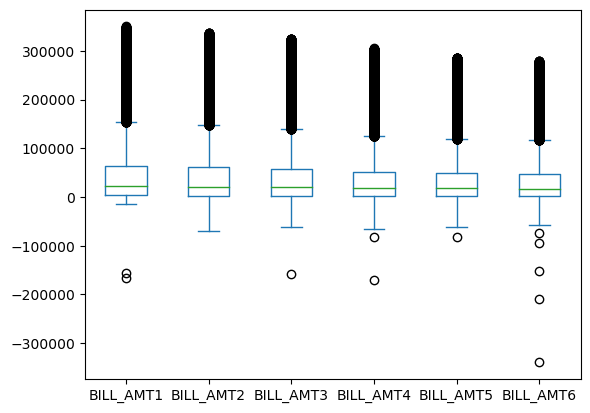

In [881]:
data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [882]:
# Treating 1% negative outlier in BILL_AMT1 and 2% negative outlier in the rest BILL_AMT
# by imputation based on the median value of the negative values of the columns
data.loc[data['BILL_AMT1']<0,'BILL_AMT1']=data['BILL_AMT1'][data['BILL_AMT1']<0].median()
data.loc[data['BILL_AMT2']<0,'BILL_AMT2']=data['BILL_AMT2'][data['BILL_AMT2']<0].median()
data.loc[data['BILL_AMT3']<0,'BILL_AMT3']=data['BILL_AMT3'][data['BILL_AMT3']<0].median()
data.loc[data['BILL_AMT4']<0,'BILL_AMT4']=data['BILL_AMT4'][data['BILL_AMT4']<0].median()
data.loc[data['BILL_AMT5']<0,'BILL_AMT5']=data['BILL_AMT5'][data['BILL_AMT5']<0].median()
data.loc[data['BILL_AMT6']<0,'BILL_AMT6']=data['BILL_AMT6'][data['BILL_AMT6']<0].median()

<Axes: >

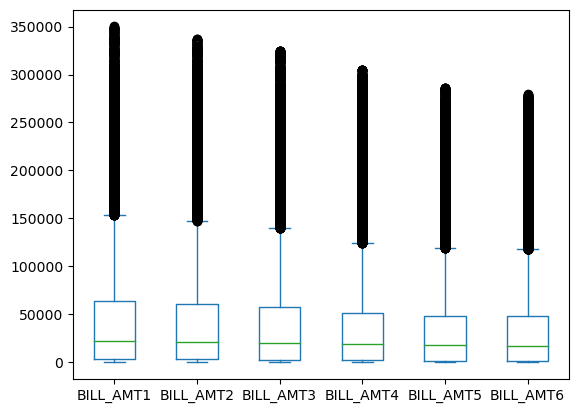

In [883]:
data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [884]:
# Treating 1% extreme outlier by imputation based on the median value of that column
data.loc[data['PAY_AMT1']>67000,'PAY_AMT1']=data['PAY_AMT1'].median()
data.loc[data['PAY_AMT2']>76700,'PAY_AMT2']=data['PAY_AMT2'].median()
data.loc[data['PAY_AMT3']>70000,'PAY_AMT3']=data['PAY_AMT3'].median()
data.loc[data['PAY_AMT4']>67100,'PAY_AMT4']=data['PAY_AMT4'].median()
data.loc[data['PAY_AMT5']>65700,'PAY_AMT5']=data['PAY_AMT5'].median()
data.loc[data['PAY_AMT6']>82700,'PAY_AMT6']=data['PAY_AMT6'].median()

<Axes: >

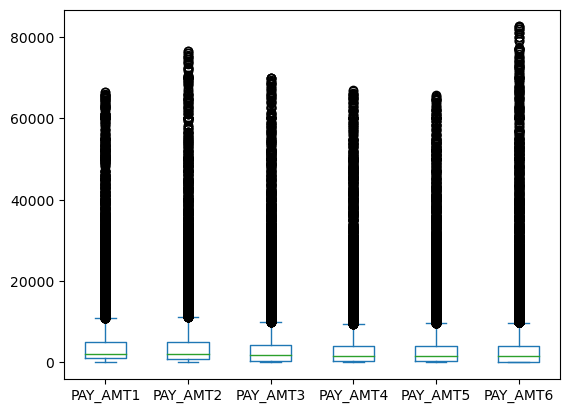

In [885]:
data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [886]:
# Treating 1% extreme outlier by imputation based on the median value of that column
data.loc[data['LIMIT_BAL']>500000,'LIMIT_BAL']=data['LIMIT_BAL'].median()

<Axes: ylabel='LIMIT_BAL'>

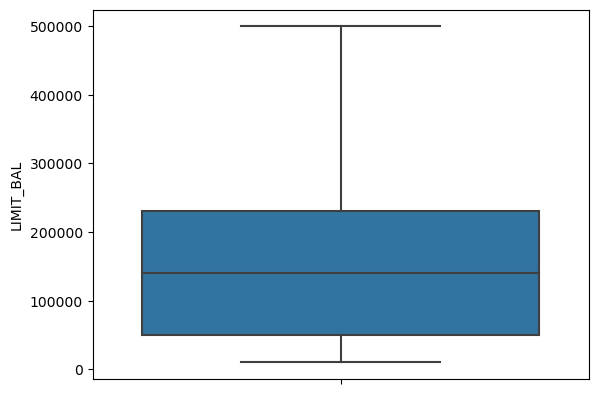

In [887]:
sns.boxplot(y=data['LIMIT_BAL'])

In [888]:
# Copying the clean data for further analysis.
data_new=data.copy(deep=True)
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Model Building-Logistic Regression



## Train Test Split

In [889]:
# Creating X array that will contain features and y array will contain the target vector
X=data_new.drop('DEF_PAY',axis=1)
y=data_new['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('train_x',train_x.shape)
print('test_x',test_x.shape)
print('train_y',train_y.shape)
print('test_y',test_y.shape)

train_x (24000, 24)
test_x (6000, 24)
train_y (24000,)
test_y (6000,)


In [890]:
# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(max_iter=2000)


# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(train_x,train_y)

LogisticRegression(max_iter=2000)

In [891]:
# Coefficient and intercept
print(logistic.coef_)
print(logistic.intercept_)

[[-1.03763489e-05 -2.71589103e-06 -7.81455216e-04 -8.55779809e-04
  -8.78976206e-04 -1.04566264e-02  2.51830189e-03  2.00513611e-03
   1.69158362e-03  1.57237996e-03  1.44914457e-03  1.32326616e-03
  -2.98153260e-06  1.39374965e-06  7.68068369e-07  2.19508471e-06
  -1.73288046e-07  3.65843861e-06 -3.01593687e-05 -4.09961704e-05
  -2.36591266e-05 -1.29300385e-05 -1.78167513e-05 -1.12992211e-05]]
[-0.00040852]


In [892]:
# Prediction of target using the features
pred=logistic.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [893]:
# Importing the sklearn package for creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,pred)
cm

array([[4733,    0],
       [1267,    0]], dtype=int64)

In [894]:
# Calculating the accuracy of the model
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
round(accuracy*100,3)


78.883

## Checking Multicolinearity

In [895]:
# Importing the package
import statsmodels.formula.api as sm
# Creating function for calculating VIF
def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [896]:
# Calculating VIF for all the Features
vif_cal(input_data=train_x)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  7.35
BILL_AMT2  VIF =  12.06
BILL_AMT3  VIF =  9.26
BILL_AMT4  VIF =  8.17
BILL_AMT5  VIF =  9.72
BILL_AMT6  VIF =  6.77
PAY_AMT1  VIF =  1.37
PAY_AMT2  VIF =  1.36
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.31
PAY_AMT5  VIF =  1.33
PAY_AMT6  VIF =  1.21


In [897]:
# Dropping squentially the feature having the high vif
vif_cal(input_data=train_x.drop('BILL_AMT2',axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  4.14
BILL_AMT3  VIF =  7.04
BILL_AMT4  VIF =  8.16
BILL_AMT5  VIF =  9.72
BILL_AMT6  VIF =  6.76
PAY_AMT1  VIF =  1.32
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.31
PAY_AMT5  VIF =  1.33
PAY_AMT6  VIF =  1.21


In [898]:
vif_cal(input_data=train_x.drop(['BILL_AMT2','BILL_AMT5'],axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  4.13
BILL_AMT3  VIF =  7.0
BILL_AMT4  VIF =  6.81
BILL_AMT6  VIF =  4.04
PAY_AMT1  VIF =  1.32
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.31
PAY_AMT6  VIF =  1.21


In [899]:
vif_cal(input_data=train_x.drop(['BILL_AMT2','BILL_AMT5','BILL_AMT3'],axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  2.9
BILL_AMT4  VIF =  5.06
BILL_AMT6  VIF =  4.02
PAY_AMT1  VIF =  1.31
PAY_AMT2  VIF =  1.32
PAY_AMT3  VIF =  1.29
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.31
PAY_AMT6  VIF =  1.21


In [900]:
# Looks like there are no more high vif that means no more interdependency between the feature
vif_cal(input_data=train_x.drop(['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4'],axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  2.24
BILL_AMT6  VIF =  2.35
PAY_AMT1  VIF =  1.31
PAY_AMT2  VIF =  1.31
PAY_AMT3  VIF =  1.27
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.21


## Checking the Individual Impact of Variables

In [901]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
Res=m.fit()
# Printing Summary
print(Res.summary())

Optimization terminated successfully.
         Current function value: 0.445289
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29976
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.1573
Time:                        11:24:44   Log-Likelihood:                -13359.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -3.893e-06   1.76e-06     -2.209      0.027   -7.35e-06   -4.39e-07
LIMIT_BAL  -1.538e-06   1.53e

In [902]:
# Dropping the feature that are not required
X.drop(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_2','ID'],axis=1,inplace=True)

In [903]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
Res=m.fit()
# Printing Summary
print(Res.summary())

Optimization terminated successfully.
         Current function value: 0.445549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29984
Method:                           MLE   Df Model:                           15
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.1568
Time:                        11:24:44   Log-Likelihood:                -13366.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -1.538e-06   1.51e-07    -10.170      0.000   -1.83e-06   -1.24e-06
SEX           -0.2517      0.

## Rebuilding the Model

In [904]:
# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('train_x',train_x.shape)
print('test_x',test_x.shape)
print('train_y',train_y.shape)
print('test_y',test_y.shape)

train_x (24000, 16)
test_x (6000, 16)
train_y (24000,)
test_y (6000,)


In [905]:
# Fitting the feature and target vector to the model
logistic.fit(train_x,train_y)
# Predicting the target
pred=logistic.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Confusion Matrix,Accuracy,Sensitivity,Specificity

In [906]:
# Creating confusion matrix
cm=confusion_matrix(test_y,pred)
cm
# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,3))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

Accuracy= 78.883
Sensitivity- 100.0
Specificity- 0.0


## Wald Chi-Square Method

In [907]:
round(Res.tvalues.pow(2)).sort_values(ascending=False).head(5)

PAY_1        1654.0
MARRIAGE      217.0
LIMIT_BAL     103.0
SEX            83.0
EDUCATION      37.0
dtype: float64

In [908]:
X1=data_new[['PAY_1','MARRIAGE','LIMIT_BAL','SEX','EDUCATION']]
y1=data_new['DEF_PAY']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=50)

# Fitting the target and the features
logistic.fit(X1_train,y1_train)

#predict
Pred2=logistic.predict(X1_test)
Pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [909]:
# Confusion Matrix and Accuracy
cm1=confusion_matrix(y1_test,Pred2)
print(cm1)

tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,3))

[[4733    0]
 [1267    0]]
Accuracy= 78.883


# Model Selection Cross validation

In [910]:
# Copying the clean data for further analysis.
data_new=data.copy(deep=True)
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [911]:
X=data_new.drop('DEF_PAY',axis=1)
y=data_new['DEF_PAY']

### Using Statsmodel Logistic Regression 

In [912]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
results=m.fit()
# Printing Summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.445289
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29976
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.1573
Time:                        11:24:45   Log-Likelihood:                -13359.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -3.893e-06   1.76e-06     -2.209      0.027   -7.35e-06   -4.39e-07
LIMIT_BAL  -1.538e-06   1.53e

In [913]:
# Predict the traget using the features
predict1=results.predict()

### Confusion Matrix,Accuracy,Sensitivity,Specificity

In [914]:
# Taking the threshold value 0.5 as it is logistic regression
threshold=0.5
predictions1=[ 0 if x < threshold else 1 for x in predict1]

# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y,predictions1)
print(cm)

tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[22378   986]
 [ 4491  2145]]
Accuracy= 81.74
Sensitivity- 95.78
Specificity- 32.32


## Using Sklearn Logistic Regression

In [915]:
# Creating X array that will contain features and y array will contain the target vector
X=data_new.drop('DEF_PAY',axis=1)
y=data_new['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression( solver='newton-cg', max_iter=200)

# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(train_x,train_y)

# Prediction of target using the features
pred=logistic.predict(train_x)
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [916]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(train_y,pred)
print(cm)

tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[17843   788]
 [ 3593  1776]]
Accuracy= 81.75
Sensitivity- 95.77
Specificity- 33.08


### Classification Report

- Classification gives a report of all the calculation of recall,precision,F1-Score and the Overall Accuracy.
- Specificity is also known as Recall of class 1 and Sensitivity is also known as Recall of class 0.


In [917]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y,predictions1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     23364
           1       0.69      0.32      0.44      6636

    accuracy                           0.82     30000
   macro avg       0.76      0.64      0.67     30000
weighted avg       0.80      0.82      0.79     30000



# Handling Class Imbalance

## ROC Curve-Optimum Threshold Selection

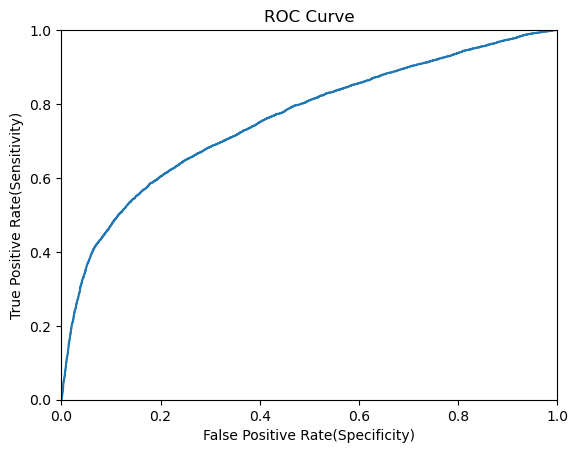

In [918]:
# Importing the roc_curve,auc
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr, tpr, thresholds = roc_curve(y,predict1)

# Drawing ROC_Curve
plt.plot(fpr,tpr)
plt.title('ROC Curve')
#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

### Area Under Curve(AUC)

In [919]:
auc(fpr,tpr)
# Higher the AUC better is the model

0.7582987095028502

In [920]:
# Calculating each threshold wise accuracy score
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict1>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(10)

,thresholds,accuracy
1620,0.451010,0.819467
1617,0.451555,0.819433
1619,0.451362,0.819433
1618,0.451409,0.819400
1616,0.451697,0.819400
1621,0.450708,0.819400
1623,0.450573,0.819400
1625,0.450108,0.819367
1622,0.450654,0.819367
1624,0.450522,0.819367


### Accuracy,Sensitivity and Specificity 

In [921]:
# Choosing thershold of 0.45 as the optimum value for better accuracy
threshold1=0.45
predictions1=[ 0 if x < threshold1 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions1)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[22150  1214]
 [ 4206  2430]]
Accuracy- 81.93
Sensitivity- 94.8
Specificity- 36.62


In [922]:
# Choosing thershold of 0.3 as the optimum value for better accuracy
threshold2=0.3
predictions2=[ 0 if x < threshold2 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions2)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[20756  2608]
 [ 3360  3276]]
Accuracy- 80.11
Sensitivity- 88.84
Specificity- 49.37


In [923]:
# Choosing thershold of 0.2 as the optimum value for better accuracy
threshold3=0.2
predictions3=[ 0 if x < threshold3 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions3)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[18021  5343]
 [ 2463  4173]]
Accuracy- 73.98
Sensitivity- 77.13
Specificity- 62.88


### Precision,Recall & F1-Score

In [924]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y,predictions1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     23364
           1       0.67      0.37      0.47      6636

    accuracy                           0.82     30000
   macro avg       0.75      0.66      0.68     30000
weighted avg       0.80      0.82      0.80     30000



## OverSampling and Undersampling

In [925]:
# Copying the clean data for further analysis.
data_new=data.copy(deep=True)
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [926]:
data_new.shape

(30000, 25)

In [927]:
# Chceking the percentage of Imbalance of the class in the data
freq=data_new['DEF_PAY'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    23364
1     6636
Name: DEF_PAY, dtype: int64
0    77.88
1    22.12
Name: DEF_PAY, dtype: float64


In [928]:
# Oversampling of minority class
# Lets increase the size by Two times
df=data_new[data_new['DEF_PAY']==1]
df_oversample=df.sample(2*len(df),replace=True)
df_oversample.shape

(13272, 25)

In [929]:
# Undersampling the majority class
## Considering 70% of class-0
df1=data_new[data_new['DEF_PAY']==0]
df_undersample=df1.sample(int(0.7*len(df1)))
df_undersample.shape

(16354, 25)

In [930]:
# Concatenating both undersample data and oversample data to create a balanced dataset
credit__balanced=pd.concat([df_oversample,df_undersample])
credit__balanced.shape

(29626, 25)

In [931]:
# Chceking the percentage of balanced data after oversampling and undersampling
freq=credit__balanced['DEF_PAY'].value_counts()
print((freq/freq.sum())*100)

0    55.201512
1    44.798488
Name: DEF_PAY, dtype: float64


### Using Statsmodel Logistic Regression

In [932]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(credit__balanced.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


In [933]:
import statsmodels.formula.api as sm

m1=sm.logit(model_formula,data=credit__balanced)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.576508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                29626
Model:                          Logit   Df Residuals:                    29602
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.1617
Time:                        11:25:15   Log-Likelihood:                -17080.
converged:                       True   LL-Null:                       -20375.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2534      0.105     -2.415      0.016      -0.459      -0.048
LIMIT_BAL  -1.106e-06   1.27e

In [934]:
# Predicting the probability of predictor 
predict_balanced=results.predict()
predict_balanced

array([0.91148026, 0.54612446, 0.5711632 , ..., 0.47948971, 0.34076629,
       0.49692814])

In [935]:
# Choosing thershold of 0.5 as it is a Logistic regression Model
threshold1=0.5
predictions1=[ 0 if x < threshold1 else 1 for x in predict_balanced]

# Creating confusion matrix
cm=confusion_matrix(credit__balanced['DEF_PAY'],predictions1)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[14070  2284]
 [ 6234  7038]]
Accuracy- 71.25
Sensitivity- 86.03
Specificity- 53.03


### Using Sklearn Logistic Regression

In [936]:
X_balanced=credit__balanced.drop('DEF_PAY',axis=1)
y_balanced=credit__balanced['DEF_PAY']

train_x, test_x, train_y, test_y = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)

# Fitting the target and the features
logistic.fit(train_x,train_y)

#predict
pred1=logistic.predict(train_x)

### Updated Sensitivity and Specificity

In [937]:
# Creating confusion matrix
cm=confusion_matrix(train_y,pred1)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[11196  1806]
 [ 5000  5698]]
Accuracy- 71.28
Sensitivity- 86.11
Specificity- 53.26


- The statsmodel logistic Regression Specificity and sklearn Logistic Regression Specificity are almost equal.

In [938]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(train_y,pred1))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77     13002
           1       0.76      0.53      0.63     10698

    accuracy                           0.71     23700
   macro avg       0.73      0.70      0.70     23700
weighted avg       0.72      0.71      0.70     23700



## SMOTE Technique

In [939]:
# Copying the clean data for further analysis.
data_new=data.copy(deep=True)
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Vizualizing Imbalanced Data Before Smote

<Axes: xlabel='LIMIT_BAL', ylabel='BILL_AMT1'>

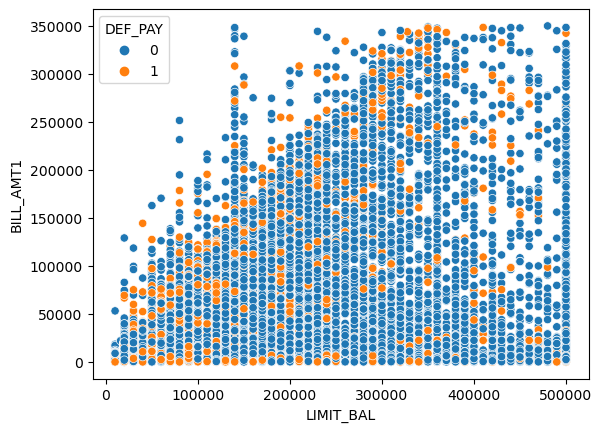

In [940]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT1',data=data_new,hue='DEF_PAY')

In [941]:
X=data_new.drop('DEF_PAY',axis=1)
y=data_new['DEF_PAY']

# Importing imblearn library for importing SMOTE Function
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.9,random_state=42)
train_x_smote,train_y_smote=smote.fit_resample(X,y)

# Getting the collection of counts of each class
import collections
print("Before_Smote",collections.Counter(y))
print("After_Smote",collections.Counter(train_y_smote))

Before_Smote Counter({0: 23364, 1: 6636})
After_Smote Counter({0: 23364, 1: 21027})


In [942]:
# Creating a new dataset having the balanced data
credit_smote=train_x_smote
credit_smote['DEF_PAY']=train_y_smote
credit_smote.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [943]:
freq=credit_smote['DEF_PAY'].value_counts()
print((freq/freq.sum())*100)

0    52.63229
1    47.36771
Name: DEF_PAY, dtype: float64


### Visulaizing balanced data after SMOTE

<Axes: xlabel='LIMIT_BAL', ylabel='BILL_AMT1'>

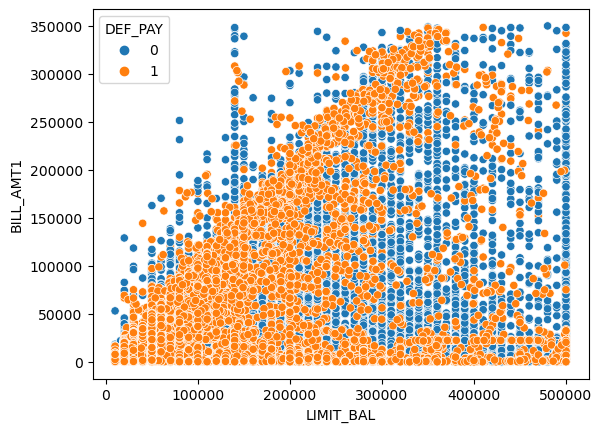

In [944]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT1',data=credit_smote,hue='DEF_PAY')

### Using Statsmodel Logistic Regression

In [945]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(credit_smote.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


In [946]:
import statsmodels.formula.api as sm

# Building Statistical Logistic Regression Model
m=sm.logit(model_formula,data=credit_smote)

results=m.fit()

# Printing the result summary
print(results.summary())

pred_smote = results.predict()

Optimization terminated successfully.
         Current function value: 0.548350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44367
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.2073
Time:                        11:25:28   Log-Likelihood:                -24342.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2570      0.089     47.993      0.000       4.083       4.431
LIMIT_BAL  -2.354e-06   1.09e

In [947]:
# Choosing thershold of 0.5 for Logistic Regression
threshold4=0.5
predictions4=[ 0 if x < threshold4 else 1 for x in pred_smote]

from sklearn.metrics import confusion_matrix

# Creating confusion matrix
cm=confusion_matrix(credit_smote['DEF_PAY'],predictions4)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[18494  4870]
 [ 6984 14043]]
Accuracy- 73.3
Sensitivity- 79.16
Specificity- 66.79


### Using Sklearn Logistic Regression

In [948]:
X=credit_smote.drop('DEF_PAY',axis=1)
y=credit_smote['DEF_PAY']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)

# Fitting the target and the features
logistic.fit(train_x,train_y)

#predict
pred1_smote=logistic.predict(train_x)

### Updated Sensitivity and Specificity

In [949]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(train_y,pred1_smote)
print(cm)

# Calculating Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[14810  3871]
 [ 5552 11279]]
Accuracy- 73.47
Sensitivity- 79.28
Specificity- 67.01


In [950]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(train_y,pred1_smote))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     18681
           1       0.74      0.67      0.71     16831

    accuracy                           0.73     35512
   macro avg       0.74      0.73      0.73     35512
weighted avg       0.74      0.73      0.73     35512



Checking for Overfitting and Underfitting

In [951]:
pred2_smote=logistic.predict(test_x)
# Creating confusion matrix
cm1=confusion_matrix(test_y,pred2_smote)
print(cm1)

# Calculating Train Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Train Accuracy-',round(accuracy*100,2))

# Calculating Test Accuracy
tot1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/tot1
print('Test Accuracy-',round(accuracy1*100,2))

[[3665 1018]
 [1405 2791]]
Train Accuracy- 73.47
Test Accuracy- 72.71


# Feature Engineering

In [952]:
credit_smote.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY'],
      dtype='object')

In [953]:
# Encoding the female sex category to 0
credit_smote.loc[credit_smote['SEX']==2,'SEX']=0

## One Hot Encoding Categorical Variables

In [954]:
# Creating dummy variables of each categorical variables
data_ohe=pd.get_dummies(credit_smote,prefix=['EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
               prefix_sep='_',columns=['EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],drop_first=True)
data_ohe.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_5_7,PAY_5_8,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,0,0,0,0,0,0,0,0,0,0
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,0,0,0,0,0,0,0,0,0,0
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,0,0,0,0,0,0,0,0,0,0


### Train_test_split

In [955]:
# Creating X array that will contain features and y array will contain the target vector
X=data_ohe.drop('DEF_PAY',axis=1)
y=data_ohe['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('train_x',train_x.shape)
print('test_x',test_x.shape)
print('train_y',train_y.shape)
print('test_y',test_y.shape)

train_x (35512, 69)
test_x (8879, 69)
train_y (35512,)
test_y (8879,)


### Building Logistic regression model

In [956]:
# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(solver='newton-cg',max_iter=200)

# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(train_x,train_y)

# Prediction of target using the features
predict=logistic.predict(test_x)
predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [957]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,predict)
print(cm)

tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[3919  764]
 [1419 2777]]
Accuracy= 75.41
Sensitivity- 83.69
Specificity- 66.18


### Checking Individual impactness of feature

In [958]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_1_6 + PAY_1_7 + PAY_1_8 + PAY_2_1 + PAY_2_2 + PAY_2_3 + PAY_2_4 + PAY_2_5 + PAY_2_6 + PAY_2_7 + PAY_2_8 + PAY_3_1 + PAY_3_2 + PAY_3_3 + PAY_3_4 + PAY_3_5 + PAY_3_6 + PAY_3_7 + PAY_3_8 + PAY_4_1 + PAY_4_2 + PAY_4_3 + PAY_4_4 + PAY_4_5 + PAY_4_6 + PAY_4_7 + PAY_4_8 + PAY_5_1 + PAY_5_2 + PAY_5_3 + PAY_5_4 + PAY_5_5 + PAY_5_6 + PAY_5_7 + PAY_5_8 + PAY_6_1 + PAY_6_2 + PAY_6_3 + PAY_6_4 + PAY_6_5 + PAY_6_6 + PAY_6_7 + PAY_6_8


In [959]:
data_ohe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6',
       'PAY_1_7', 'PAY_1_8', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_1', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_1', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [960]:
# Dropping all the Non-Impactful Features
data_ohe.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4','PAY_1_6','PAY_1_7', 'PAY_1_8','PAY_2_2', 'PAY_2_3','PAY_2_5','PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5','PAY_3_6','PAY_3_7', 'PAY_3_8',
       'PAY_4_3', 'PAY_4_4','PAY_4_6','PAY_4_7','PAY_4_8','PAY_5_1','PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7','PAY_5_8','PAY_6_1','PAY_6_4','PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],axis=1,inplace=True)

In [961]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_4_5 + PAY_5_2 + PAY_6_2 + PAY_6_3


In [962]:
import statsmodels.formula.api as sm
# Rebuilding Statsmodel for rechecking
m1=sm.logit(model_formula,data=data_ohe)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.504510
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44359
Method:                           MLE   Df Model:                           31
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.2707
Time:                        11:26:11   Log-Likelihood:                -22396.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6810      0.063     10.793      0.000       0.557       0.805
LIMIT_BAL   -1.985e-06   

In [963]:
data_ohe.drop(['BILL_AMT5','PAY_4_5','PAY_6_3'],axis=1,inplace=True)

In [964]:
## OLS formula Function Calling
model_formula=ols_formula(data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + PAY_6_2


In [965]:
import statsmodels.formula.api as sm
# Rebuilding Statsmodel for rechecking
m1=sm.logit(model_formula,data=data_ohe)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.504573
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44362
Method:                           MLE   Df Model:                           28
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.2706
Time:                        11:26:11   Log-Likelihood:                -22398.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6830      0.063     10.828      0.000       0.559       0.807
LIMIT_BAL   -1.993e-06   

In [966]:
data_ohe.drop(['PAY_6_2'],axis=1,inplace=True)

In [967]:
## OLS formula Function Calling
model_formula=ols_formula(data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2


In [968]:
import statsmodels.formula.api as sm

m1=sm.logit(model_formula,data=data_ohe)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.504613
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44363
Method:                           MLE   Df Model:                           27
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.2705
Time:                        11:26:12   Log-Likelihood:                -22400.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6859      0.063     10.877      0.000       0.562       0.809
LIMIT_BAL   -2.004e-06   

### Checking Multicolinearity

In [969]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [970]:
# Calculating VIF
vif_cal(input_data=data_ohe, dependent_col="DEF_PAY")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.4
SEX  VIF =  1.04
AGE  VIF =  1.31
BILL_AMT6  VIF =  1.23
PAY_AMT1  VIF =  1.31
PAY_AMT2  VIF =  1.33
PAY_AMT3  VIF =  1.29
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.22
EDUCATION_2  VIF =  1.28
EDUCATION_3  VIF =  1.3
EDUCATION_4  VIF =  1.02
MARRIAGE_2  VIF =  1.24
MARRIAGE_3  VIF =  1.02
PAY_1_1  VIF =  1.21
PAY_1_2  VIF =  1.28
PAY_1_3  VIF =  1.07
PAY_1_4  VIF =  1.05
PAY_1_5  VIF =  1.32
PAY_2_1  VIF =  1.45
PAY_2_4  VIF =  1.39
PAY_3_1  VIF =  1.91
PAY_3_2  VIF =  1.72
PAY_4_1  VIF =  1.54
PAY_4_2  VIF =  2.03
PAY_5_2  VIF =  1.64


### Rebuilding the Model 

In [971]:
X=data_ohe.drop('DEF_PAY',axis=1)
y=data_ohe['DEF_PAY']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)
# Fitting the target and the features
logistic.fit(train_x,train_y)

#predict
pred2=logistic.predict(test_x)
pred3=logistic.predict(train_x)

### Confusion Matrix,Accuracy,Sensitivity and Specificity

In [972]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,pred2)
print(cm,"\n")

cm1=confusion_matrix(train_y,pred3)
print(cm1,"\n")

# Calculating Train Accuracy
tot1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/tot1
print('Train Accuracy=',round(accuracy1*100,2))

# Calculating Test Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Test Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[3872  811]
 [1411 2785]] 

[[15575  3106]
 [ 5776 11055]] 

Train Accuracy= 74.99
Test Accuracy= 74.97
Sensitivity- 82.68
Specificity- 66.37


In [973]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred2))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78      4683
           1       0.77      0.66      0.71      4196

    accuracy                           0.75      8879
   macro avg       0.75      0.75      0.75      8879
weighted avg       0.75      0.75      0.75      8879



## Binning Continous Variables

In [974]:
data_ohe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_2_1',
       'PAY_2_4', 'PAY_3_1', 'PAY_3_2', 'PAY_4_1', 'PAY_4_2', 'PAY_5_2'],
      dtype='object')

### Binning LIMIT_BAL

In [975]:
df=pd.qcut(data_ohe['LIMIT_BAL'],q=10)
df['bin1']=pd.qcut(data_ohe['LIMIT_BAL'],q=10)
df['bin1'].value_counts()

(9999.999, 30000.0]       7218
(30000.0, 50000.0]        5725
(120000.0, 160000.0]      4942
(80000.0, 120000.0]       4691
(243354.434, 340000.0]    4545
(160000.0, 200000.0]      4488
(340000.0, 500000.0]      4333
(200000.0, 243354.434]    3545
(60000.0, 80000.0]        3539
(50000.0, 60000.0]        1365
Name: LIMIT_BAL, dtype: int64

### Binning AGE

In [976]:
df['bin2']=pd.qcut(data_ohe['AGE'],q=10)
df['bin2'].value_counts()

(29.0, 32.0]      5737
(20.999, 25.0]    5408
(34.0, 37.0]      5161
(39.0, 43.0]      4965
(27.0, 29.0]      4359
(43.0, 48.0]      4220
(48.0, 79.0]      4033
(25.0, 27.0]      3850
(32.0, 34.0]      3680
(37.0, 39.0]      2978
Name: AGE, dtype: int64

### Binning BILL_AMT6

In [977]:
df['bin3']=pd.qcut(data_ohe['BILL_AMT6'],q=10)
df['bin3'].value_counts()

(-202.501, 0.0]          6076
(9295.454, 17071.0]      4508
(532.0, 2805.0]          4439
(2805.0, 9295.454]       4439
(24492.0, 36325.0]       4439
(36325.0, 58092.923]     4439
(58092.923, 102620.0]    4439
(102620.0, 279503.0]     4439
(17071.0, 24492.0]       4370
(0.0, 532.0]             2803
Name: BILL_AMT6, dtype: int64

### Binning PAY_AMT1 to PAY_AMT6

In [978]:
df['bin4']=pd.qcut(data_ohe['PAY_AMT1'],q=10,duplicates='drop')
df['bin5']=pd.qcut(data_ohe['PAY_AMT2'],q=10,duplicates='drop')
df['bin6']=pd.qcut(data_ohe['PAY_AMT3'],q=10,duplicates='drop')
df['bin7']=pd.qcut(data_ohe['PAY_AMT4'],q=10,duplicates='drop')
df['bin8']=pd.qcut(data_ohe['PAY_AMT5'],q=10,duplicates='drop')
df['bin9']=pd.qcut(data_ohe['PAY_AMT6'],q=10,duplicates='drop')

In [979]:
# Concatenating all Created bins to form dataset
data_bins=pd.concat([df['bin1'],df['bin2'],df['bin3'],df['bin4'],df['bin5'],df['bin6'],df['bin7'],df['bin8'],df['bin9']],axis=1)
data_bins.head()

,LIMIT_BAL,AGE,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,"(9999.999, 30000.0]","(20.999, 25.0]","(-202.501, 0.0]","(-0.001, 272.158]","(241.81, 1000.0]","(-0.001, 88.0]","(-0.001, 10.895]","(-0.001, 1.406]","(-0.001, 400.0]"
1,"(80000.0, 120000.0]","(25.0, 27.0]","(2805.0, 9295.454]","(-0.001, 272.158]","(241.81, 1000.0]","(626.08, 1085.132]","(926.0, 1284.419]","(-0.001, 1.406]","(1287.0, 2000.0]"
2,"(80000.0, 120000.0]","(32.0, 34.0]","(9295.454, 17071.0]","(1070.0, 1530.956]","(1479.0, 2000.0]","(626.08, 1085.132]","(926.0, 1284.419]","(943.53, 1341.948]","(4252.0, 7222.0]"
3,"(30000.0, 50000.0]","(34.0, 37.0]","(24492.0, 36325.0]","(1530.956, 2000.0]","(2000.0, 2500.0]","(1085.132, 1570.0]","(926.0, 1284.419]","(943.53, 1341.948]","(869.695, 1287.0]"
4,"(30000.0, 50000.0]","(48.0, 79.0]","(17071.0, 24492.0]","(1530.956, 2000.0]","(8929.0, 76653.0]","(8000.0, 70000.0]","(7467.952, 67052.0]","(460.0, 943.53]","(400.0, 869.695]"


In [980]:
data_bins.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### One Hot Encoding

In [981]:
# Creating dummy variables  
data_bin_ohe=pd.get_dummies(data_bins,prefix=['LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],prefix_sep='_',columns=['LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],drop_first=True)
data_bin_ohe.head(5)

,"LIMIT_BAL_(30000.0, 50000.0]","LIMIT_BAL_(50000.0, 60000.0]","LIMIT_BAL_(60000.0, 80000.0]","LIMIT_BAL_(80000.0, 120000.0]","LIMIT_BAL_(120000.0, 160000.0]","LIMIT_BAL_(160000.0, 200000.0]","LIMIT_BAL_(200000.0, 243354.434]","LIMIT_BAL_(243354.434, 340000.0]","LIMIT_BAL_(340000.0, 500000.0]","AGE_(25.0, 27.0]",...,"PAY_AMT5_(2992.0, 4410.0]","PAY_AMT5_(4410.0, 7445.0]","PAY_AMT5_(7445.0, 65663.0]","PAY_AMT6_(400.0, 869.695]","PAY_AMT6_(869.695, 1287.0]","PAY_AMT6_(1287.0, 2000.0]","PAY_AMT6_(2000.0, 2897.475]","PAY_AMT6_(2897.475, 4252.0]","PAY_AMT6_(4252.0, 7222.0]","PAY_AMT6_(7222.0, 82615.0]"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [982]:
# Concatenating the dummy variables to original dataframe
credit__bin=pd.concat([data_ohe,data_bin_ohe],axis=1)
credit__bin.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,"PAY_AMT5_(2992.0, 4410.0]","PAY_AMT5_(4410.0, 7445.0]","PAY_AMT5_(7445.0, 65663.0]","PAY_AMT6_(400.0, 869.695]","PAY_AMT6_(869.695, 1287.0]","PAY_AMT6_(1287.0, 2000.0]","PAY_AMT6_(2000.0, 2897.475]","PAY_AMT6_(2897.475, 4252.0]","PAY_AMT6_(4252.0, 7222.0]","PAY_AMT6_(7222.0, 82615.0]"
0,1,20000.0,0,24,0.0,0.0,689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,3261.0,0.0,1000.0,1000.0,1000.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,3,90000.0,0,34,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,...,0,0,0,0,0,0,0,0,1,0
3,4,50000.0,0,37,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,...,0,0,0,0,1,0,0,0,0,0
4,5,50000.0,1,57,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,...,0,0,0,1,0,0,0,0,0,0


In [983]:
# Dropping the original variables after creating their bins
credit__bin.drop(['ID','LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1,inplace=True)
credit__bin.head()

,SEX,DEF_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_1,PAY_1_2,PAY_1_3,...,"PAY_AMT5_(2992.0, 4410.0]","PAY_AMT5_(4410.0, 7445.0]","PAY_AMT5_(7445.0, 65663.0]","PAY_AMT6_(400.0, 869.695]","PAY_AMT6_(869.695, 1287.0]","PAY_AMT6_(1287.0, 2000.0]","PAY_AMT6_(2000.0, 2897.475]","PAY_AMT6_(2897.475, 4252.0]","PAY_AMT6_(4252.0, 7222.0]","PAY_AMT6_(7222.0, 82615.0]"
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [984]:
# Lets remove the special Character before building the statsmodel
credit__bin.rename(columns=lambda s: s.replace("(", ""),inplace=True)
credit__bin.rename(columns=lambda s: s.replace(",", ""),inplace=True)
credit__bin.rename(columns=lambda s: s.replace("]", ""),inplace=True)
credit__bin.rename(columns=lambda s: s.replace(".", ""),inplace=True)
credit__bin.rename(columns=lambda s: s.replace(" ", "_"),inplace=True)
credit__bin.head()

,SEX,DEF_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_1,PAY_1_2,PAY_1_3,...,PAY_AMT5_29920_44100,PAY_AMT5_44100_74450,PAY_AMT5_74450_656630,PAY_AMT6_4000_869695,PAY_AMT6_869695_12870,PAY_AMT6_12870_20000,PAY_AMT6_20000_2897475,PAY_AMT6_2897475_42520,PAY_AMT6_42520_72220,PAY_AMT6_72220_826150
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [985]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(credit__bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_500000_600000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243354434 + LIMIT_BAL_243354434_3400000 + LIMIT_BAL_3400000_5000000 + AGE_250_270 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_370_390 + AGE_390_430 + AGE_430_480 + AGE_480_790 + BILL_AMT6_00_5320 + BILL_AMT6_5320_28050 + BILL_AMT6_28050_9295454 + BILL_AMT6_9295454_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_244920_363250 + BILL_AMT6_363250_58092923 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_272158_10700 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_

### Checking Individual Impactness of features

In [986]:
import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=credit__bin)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.506880
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44299
Method:                           MLE   Df Model:                           91
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.2673
Time:                        11:26:34   Log-Likelihood:                -22501.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.6462      0.064     10.066      0.000  

In [987]:
## Function Calling
model_formula=ols_formula(credit__bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=credit__bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_500000_600000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243354434 + LIMIT_BAL_243354434_3400000 + LIMIT_BAL_3400000_5000000 + AGE_250_270 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_370_390 + AGE_390_430 + AGE_430_480 + AGE_480_790 + BILL_AMT6_00_5320 + BILL_AMT6_5320_28050 + BILL_AMT6_28050_9295454 + BILL_AMT6_9295454_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_244920_363250 + BILL_AMT6_363250_58092923 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_272158_10700 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_

In [988]:
## Function Calling
model_formula=ols_formula(credit__bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=credit__bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_500000_600000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243354434 + LIMIT_BAL_243354434_3400000 + LIMIT_BAL_3400000_5000000 + AGE_250_270 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_370_390 + AGE_390_430 + AGE_430_480 + AGE_480_790 + BILL_AMT6_00_5320 + BILL_AMT6_5320_28050 + BILL_AMT6_28050_9295454 + BILL_AMT6_9295454_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_244920_363250 + BILL_AMT6_363250_58092923 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_272158_10700 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_

In [989]:
# Removing all the features having pvalue>=0.05 considering as Non-Impactfull Features
credit__bin.drop(['BILL_AMT6_363250_58092923'],axis=1,inplace=True)

In [990]:
## Function Calling
model_formula=ols_formula(credit__bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=credit__bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_500000_600000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243354434 + LIMIT_BAL_243354434_3400000 + LIMIT_BAL_3400000_5000000 + AGE_250_270 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_370_390 + AGE_390_430 + AGE_430_480 + AGE_480_790 + BILL_AMT6_00_5320 + BILL_AMT6_5320_28050 + BILL_AMT6_28050_9295454 + BILL_AMT6_9295454_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_244920_363250 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_272158_10700 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AMT2_24181_10000 + PAY_AMT2_

In [991]:
# Removing all the features having pvalue>=0.05 considering as Non-Impactfull Features
credit__bin.drop(['BILL_AMT6_244920_363250'],axis=1,inplace=True)

In [992]:
## Function Calling
model_formula=ols_formula(credit__bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=credit__bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_500000_600000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243354434 + LIMIT_BAL_243354434_3400000 + LIMIT_BAL_3400000_5000000 + AGE_250_270 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_370_390 + AGE_390_430 + AGE_430_480 + AGE_480_790 + BILL_AMT6_00_5320 + BILL_AMT6_5320_28050 + BILL_AMT6_28050_9295454 + BILL_AMT6_9295454_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_272158_10700 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AMT2_24181_10000 + PAY_AMT2_10000_14790 + PAY_AMT2_147

### Checking MultiColinearity

In [993]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [994]:
# Calculating VIF
vif_cal(input_data=credit__bin, dependent_col="DEF_PAY")

SEX  VIF =  1.07
EDUCATION_2  VIF =  1.31
EDUCATION_3  VIF =  1.32
EDUCATION_4  VIF =  1.03
MARRIAGE_2  VIF =  1.3
MARRIAGE_3  VIF =  1.02
PAY_1_1  VIF =  1.35
PAY_1_2  VIF =  1.32
PAY_1_3  VIF =  1.12
PAY_1_4  VIF =  1.06
PAY_1_5  VIF =  1.33
PAY_2_1  VIF =  1.47
PAY_2_4  VIF =  1.41
PAY_3_1  VIF =  1.99
PAY_3_2  VIF =  2.12
PAY_4_1  VIF =  1.61
PAY_4_2  VIF =  2.45
PAY_5_2  VIF =  1.82
LIMIT_BAL_300000_500000  VIF =  1.68
LIMIT_BAL_500000_600000  VIF =  1.23
LIMIT_BAL_600000_800000  VIF =  1.59
LIMIT_BAL_800000_1200000  VIF =  1.84
LIMIT_BAL_1200000_1600000  VIF =  1.94
LIMIT_BAL_1600000_2000000  VIF =  1.92
LIMIT_BAL_2000000_243354434  VIF =  1.78
LIMIT_BAL_243354434_3400000  VIF =  2.04
LIMIT_BAL_3400000_5000000  VIF =  2.06
AGE_250_270  VIF =  1.62
AGE_270_290  VIF =  1.74
AGE_290_320  VIF =  1.99
AGE_320_340  VIF =  1.71
AGE_340_370  VIF =  2.01
AGE_370_390  VIF =  1.64
AGE_390_430  VIF =  2.02
AGE_430_480  VIF =  1.89
AGE_480_790  VIF =  1.89
BILL_AMT6_00_5320  VIF =  1.84
BILL_

### Building Logistic Regression Model

In [995]:
X=credit__bin.drop(['DEF_PAY'],axis=1)
y=credit__bin['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(max_iter=200)

# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(train_x,train_y)

# Prediction of target using the features
predict=logistic.predict(test_x)
predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

### Confusion Matrix,Accuracy,Sensitivity and Specificity

In [996]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix

# Prediction of target using the train features
predict2=logistic.predict(train_x)

# Confusion Matrix for train data
cm1=confusion_matrix(train_y,predict2)
print(cm1)

# Confusion Matrix for test data
cm=confusion_matrix(test_y,predict)
print(cm)

# Train Accuracy
tot1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/tot1
print('Train Accuracy=',round(accuracy1*100,2))

# Test Accuracy
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Test Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[15533  3148]
 [ 5426 11405]]
[[3828  855]
 [1364 2832]]
Train Accuracy= 75.86
Test Accuracy= 75.01
Sensitivity- 81.74
Specificity- 67.49


# Decision Tree Model

In [997]:
# Creating X array that will contain features and y array will contain the target vector
X=credit_smote.drop('DEF_PAY',axis=1)
y=credit_smote['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('train_x',train_x.shape)
print('test_x',test_x.shape)
print('train_y',train_y.shape)
print('test_y',test_y.shape)

train_x (35512, 24)
test_x (8879, 24)
train_y (35512,)
test_y (8879,)


In [998]:
#Building Tree Model
from sklearn.tree import DecisionTreeClassifier

# Instantiating the DecisionTreeClassifier and keeping the max_depth as 8(choosen by fine tuning the pruning parameter) for optimal IGV
DTree = DecisionTreeClassifier(max_depth=8)

# Building a Decision Tree Model by fitting the train target and the train features
DTree.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=8)

|--- PAY_1 <= 0.50
|   |--- PAY_2 <= 0.50
|   |   |--- SEX <= 0.50
|   |   |   |--- PAY_AMT3 <= 989.93
|   |   |   |   |--- MARRIAGE <= 1.50
|   |   |   |   |   |--- BILL_AMT1 <= 1396.72
|   |   |   |   |   |   |--- BILL_AMT3 <= 5196.50
|   |   |   |   |   |   |   |--- EDUCATION <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- EDUCATION >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BILL_AMT3 >  5196.50
|   |   |   |   |   |   |   |--- PAY_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PAY_4 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BILL_AMT1 >  1396.72
|   |   |   |   |   |   |--- BILL_AMT4 <= 9.04
|   |   |   |   |   |   |   |--- PAY_AMT1 <= 1656.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PAY_AMT1 >  1656.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BILL_AMT4 >  

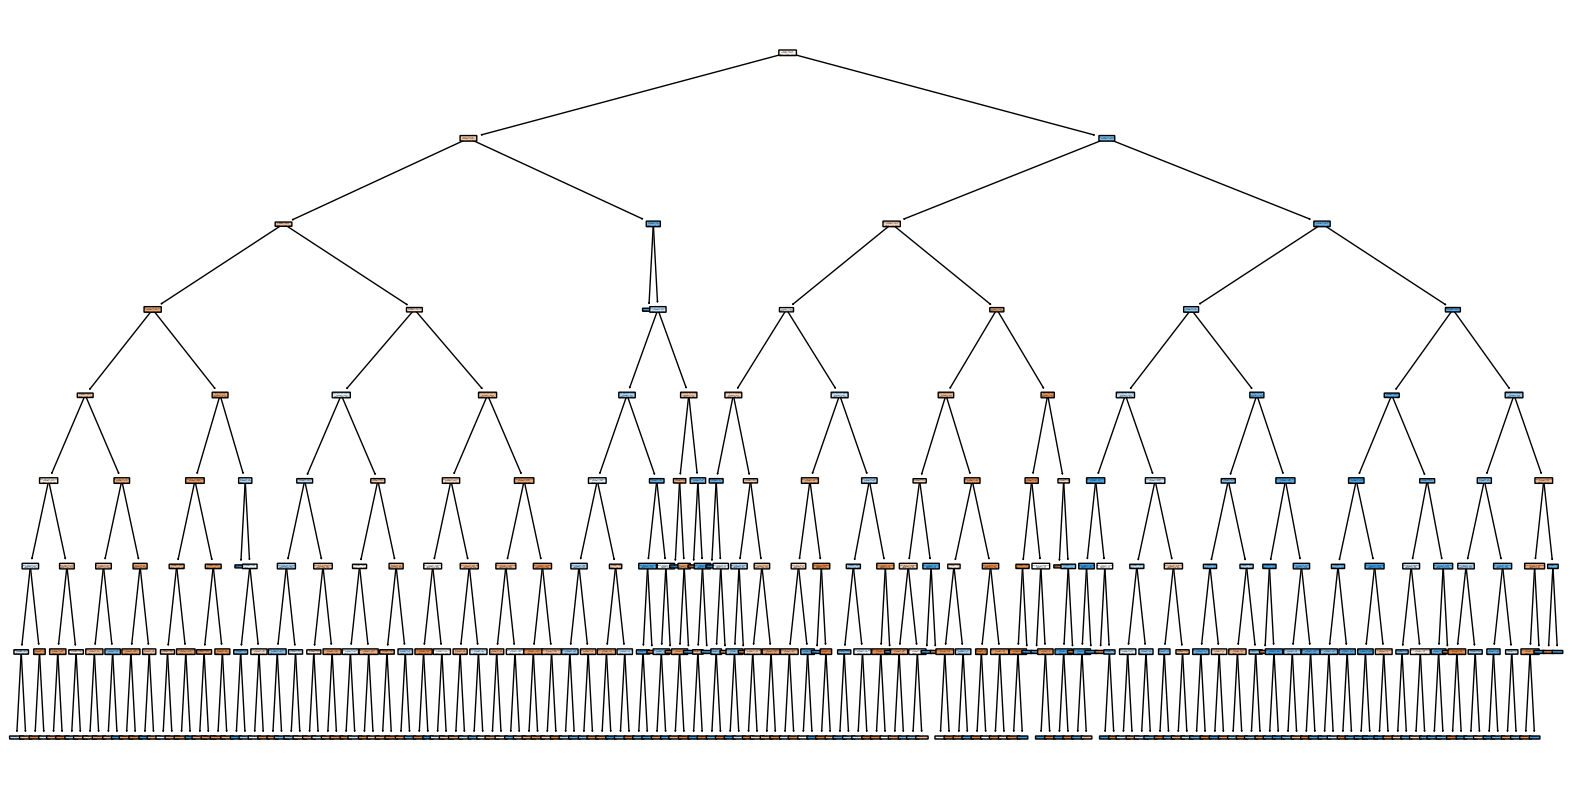

In [999]:
#Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(20,10))
plot_tree(DTree, filled=True,rounded=True,impurity=False,feature_names=list(train_x.columns))
print(export_text(DTree,feature_names=list(train_x.columns)))

In [1000]:
# Predicting the target using the test data features
pred_dtree=DTree.predict(test_x)
pred_dtree

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#Model Validation

## Confusion Matrix and Accuracy

In [1001]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the test data and the predicted value
cm=confusion_matrix(test_y,pred_dtree)
print(cm)

# Calculating the accuracy of the predicted value of the test data
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[3618 1065]
 [1166 3030]]
Accuracy= 74.87
Sensitivity- 77.26
Specificity- 72.21


## Checking for Overfiiting and Underfitting of Model

In [1002]:
# Predicting the target using the train data features
pred_dtree1=DTree.predict(train_x)

# Creating Confusion matrix using the train data and the predicted value
cm1=confusion_matrix(train_y,pred_dtree1)
print(cm1)

# Calculating the accuracy of the train data
tot1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/tot1
print('Train Accuracy=',round(accuracy1*100,2))

# Calculating the accuracy of the test data
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Test Accuracy=',round(accuracy*100,2))

[[14873  3808]
 [ 4362 12469]]
Train Accuracy= 76.99
Test Accuracy= 74.87


## K-Fold Cross Validation

In [1003]:
#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(DTree,X, y,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.22635135 0.71097094 0.70624014 0.7141248  0.75625141 0.77900428
 0.41157918 0.71772922 0.71006984 0.71164677]
Avg K-Fold Accuracy 0.6443967931662232


- There can be a situation of overfitting on train data as well as test data and model may memorize the train and test to check this we can use K-Fold Cross Validation


# Random Forest

## Building Random Forest 

In [1004]:
import time

In [1005]:
X=credit_smote.drop('DEF_PAY',axis=1)
y=credit_smote['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=50)

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

forest=RandomForestClassifier(n_estimators=100,max_features=7,max_depth=10,random_state=42)

forest.fit(train_x,train_y)

prediction=forest.predict(train_x)

print("Time taken by Random Forest "+ str((time.time() - start_time))+ " Seconds")

Time taken by Random Forest 15.63654899597168 Seconds


## Confusion Matrix,Accuracy,Sensitivityand Specificity

In [1006]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the test data and the predicted value
cm=confusion_matrix(train_y,prediction)
print(cm)

# Calculating the accuracy of the predicted value of the test data
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[16467  2214]
 [ 4290 12541]]
Accuracy= 81.69
Sensitivity- 88.15
Specificity- 74.51


In [1007]:
# Predicting the target using the test data features
prediction1=forest.predict(test_x)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(test_y,prediction1)
print(cm1)

# Calculating the accuracy of the train data
tot=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/tot
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
tot1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/tot1
print('Test Accuracy=',round(accuracy1*100,2))

[[3930  753]
 [1197 2999]]
Train Accuracy= 81.69
Test Accuracy= 78.04


## Findings
- After hyperparameter tuning we have accuracy of
Train Accuracy= 81
Test Accuracy= 78 but the specificity which is most important is more that the decsion tree model.
